In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.stats.diagnostic import acorr_ljungbox

In [3]:
region='BRETAGNE'
data = pd.read_csv('../dataset_centrale/data/train/{}.csv'.format(region),header=0, index_col=0, parse_dates=True, squeeze=True)
df=data["Consommation"]

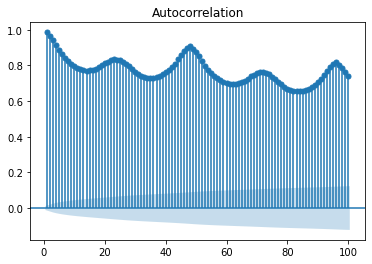

In [4]:
# The autocorrelation function of the volatility is long range.
sm.graphics.tsa.plot_acf( 48*df ,lags=100, zero=False)
plt.show()

In [5]:
models = []
for i in range(1,40):
    ft = arch_model(df,vol='ARCH', p=i).fit()
    
    models.append(( i,ft.bic,ft.aic))

etween 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
Iteration:      1,   Func. Count:     28,   Neg. LLF: 232617.34034893432
Iteration:      2,   Func. Count:     55,   Neg. LLF: 257576.60125033575
Iteration:      3,   Func. Count:     83,   Neg. LLF: 292915.1971992739
Iteration:      4,   Func. Count:    111,   Neg. LLF: 231718.9996618912
Iteration:      5,   Func. Count:    139,   Neg. LLF: 280217.4446589744
Iteration:      6,   Func. Count:    168,   Neg. LLF: 231487.2410916445
Iteration:      7,   Func. Count:    196,   Neg. LLF: 306975.3190917692
Iteration:      8,   Func. Count:    225,   Neg. LLF: 231460.42058288003
Iteration:      9,   Func. Count:    252,   Neg. LLF: 231461.48061299618
Iteration:     10,   Func. Count:    280,   Neg. LLF: 307074.015540687
Iteration:     11,   Func. Count:    309,   Neg. LLF: 231501.39005977084
Iteration:     12,

In [6]:
models = pd.DataFrame(models,columns=['order','BIC','AIC']).set_index('order')

models = models.assign(dBIC=( models.BIC - models.BIC.min()),
              dAIC =( models.AIC - models.AIC.min()))

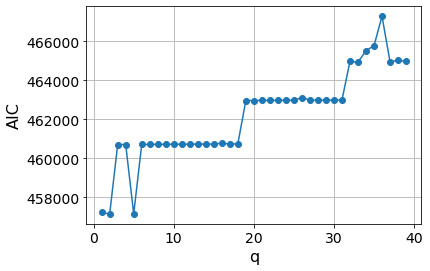

In [7]:
plt.plot(models.AIC,'-o')
plt.xlabel('q',fontsize=16)
plt.ylabel('AIC',fontsize=16)
plt.tick_params(labelsize=14)
plt.grid()

In [8]:
choix=int(models[models["AIC"]==models.AIC.min()].index[0])


In [9]:
ft = arch_model(df,vol='ARCH', p=choix).fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 231569.27675773922
Iteration:      2,   Func. Count:     11,   Neg. LLF: 6929959.456569074
Iteration:      3,   Func. Count:     18,   Neg. LLF: 230499.25770668825
Iteration:      4,   Func. Count:     24,   Neg. LLF: 230347.9568945749
Iteration:      5,   Func. Count:     29,   Neg. LLF: 230347.82989974422
Iteration:      6,   Func. Count:     34,   Neg. LLF: 230347.82707395844
Iteration:      7,   Func. Count:     39,   Neg. LLF: 230347.80479878694
C:\Users\maxwo\anaconda3\lib\site-packages\arch\univariate\base.py:316: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.537e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
Iteration:      8,   Func. Co

In [10]:
a=ft.forecast(horizon=1)

C:\Users\maxwo\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [11]:
print(a.variance)